<a href="https://colab.research.google.com/github/caiobellezi/estudos/blob/master/Estudos_Iris_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com atributos numéricos.

Exercicio proposto por:

Prof. Hugo de Paula - PUC Minas

-------------------------------------------------------------------------------

### Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/Iris/

3 classes (setosa, virginica, versicolor)

50 amostras por classe

4 atributos reais positivos (comp. pétala, comp. sépala, larg. pétala, larg. sépala)


In [23]:
#instalar bibliotecas necessárias para visualização da arvore de decisão
!pip install pydotplus -q
!pip install dtreeviz -q

Importar as bibliotecas necessárias
* `Pandas`: Trabalhar com dataframes
* `sklearn`:
  * `datasets`: para carregar a base de dados de trabalho
  * `tree`: será utilizado para visualicao *pydotplus*
  * `LabelEncoder`: Converte a label escolhida em valores binário [0, 1]
  * `accuracy_score`: Testa a acurácia do modelo
  * `classification_report`: Sumariza a classificação
  * `confusion_matrix`: Gera matriz de confusão
  * `train_test_split`: Divide o dataset entre treino e teste
  * `DecisionTreeClassifier`: Modelo para treinamento de árvore de decisão
  * `DictVectorizer`: Converte um dicionário em valos binários [0, 1]

In [24]:
import pandas as pd
from sklearn import datasets, tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

## Carregar base de dados e dividie entre treino e teste

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

Por padrão, 75% da base é utilizada para treinamento e 25% para testes. No código a seguir, são utilizados 15% para teste e 85% para treinamento.

In [25]:
# Importar base de dados iris
iris = datasets.load_iris()

X, y = iris.data, iris.target
class_names = iris.target_names
print(class_names)

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15)

['setosa' 'versicolor' 'virginica']


In [26]:
X_test.shape

(23, 4)

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ` DecisionTreeClassifier()`
2.   Treinar o modelo: `fit()`
3.   Testar o modelo:`predict()`

In [27]:
dt_iris = DecisionTreeClassifier(random_state=0, criterion="entropy", class_weight={0:1, 1: 1})
dt_iris = dt_iris.fit(X_train, y_train)
print("Acurácia (treino):", dt_iris.score(X_train, y_train))

y_pred = dt_iris.predict(X_test)
print("Acurácia (teste):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[x+ " (prev)" for x in iris.target_names])
print(cnf_table)

Acurácia (treino): 1.0
Acurácia (teste): 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

            setosa (prev)  versicolor (prev)  virginica (prev)
setosa                  7                  0                 0
versicolor              0                 11                 0
virginica               0                  0                 5


## Exibir arvore de decisao


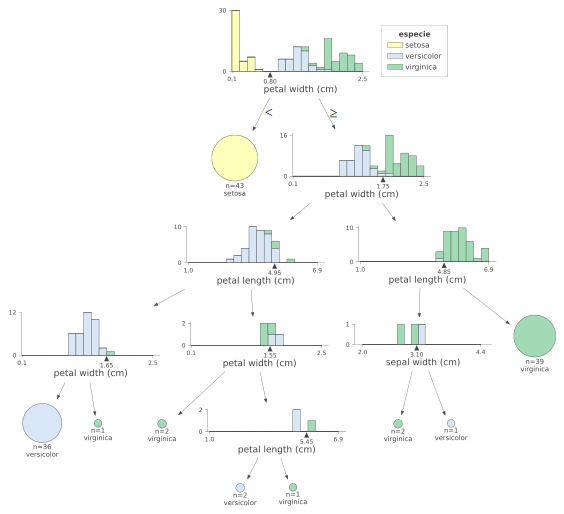

In [31]:
from dtreeviz.trees import *

viz = dtreeviz(dt_iris,
               X_train,
               y_train,
               target_name="especie",
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"]);

viz

In [34]:
import pydotplus

dot_data = tree.export_graphviz(dt_iris, out_file=None,
                                proportion=True,
                                filled=True,
                                feature_names=iris.feature_names,
                                class_names=["setosa", "versicolor", "virginica"]);

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf("dt_iris.pdf")

True